<a href="https://colab.research.google.com/github/monsieurshiva/AdvancedDeepLearning/blob/main/ObjectDetection/Object_Localization_BB_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object localization - Bounding Box




## The Oxford-IIIT Pet Dataset
Omkar M Parkhi, Andrea Vedaldi, Andrew Zisserman and C. V. Jawahar have created a 37 category pet dataset with roughly 200 images for each class. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

Link to dataset: http://www.robots.ox.ac.uk/~vgg/data/pets/

https://drive.google.com/file/d/1uyjsKeXHv0-NBhHEBfAmqe9JLhi3bJ30/view?usp=sharing

https://drive.google.com/file/d/1kbmzEWJIFcHw7HMmokj6D7DT5M2aMzNv/view?usp=sharing

In [31]:
import tensorflow 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

##### Load the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
DATASET_FOLDER = "/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/Session 3/images" #unzip the downloaded images and keep it under the folder 'images'
TRAIN_CSV = "/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/Session 3/train-2.csv"
VALIDATION_CSV = "/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/Session 3/validation-3.csv"

In [8]:
d1=pd.read_csv(TRAIN_CSV,header=None)
d1.head(2)
#This file contain the image name and the object bounding box informations for all the train images

,0,1,2,3,4,5,6,7,8
0,C:/Users/Amit/Documents/Great Learning/M6 Adva...,400,600,173,72,265,158,abyssinian,0
1,C:/Users/Amit/Documents/Great Learning/M6 Adva...,500,375,72,105,288,291,abyssinian,0


In [9]:
len(d1)

3006

In [20]:
#Extracting only image names
X_train=[]
for i in range(len(d1)):
    X_train.append( "/" + 
                   d1[0][i].split('/')[-1])
X_train[:5]


['/Abyssinian_1.jpg',
 '/Abyssinian_10.jpg',
 '/Abyssinian_100.jpg',
 '/Abyssinian_101.jpg',
 '/Abyssinian_102.jpg']

In [21]:
ytrain=pd.DataFrame()

In [22]:
#Scale the bounding box with respect to the image size of 128x128
ytrain['x0']=d1[3]*128/d1[2]
ytrain['y0']=d1[4]*128/d1[1]
ytrain['x1']=(d1[5]-d1[3])*128/d1[2]
ytrain['y1']=(d1[6]-d1[4])*128/d1[1]

In [23]:
ytrain.head(5)

,x0,y0,x1,y1
0,36.906667,23.040000,19.626667,27.520000
1,24.576000,26.880000,73.728000,47.616000
2,49.055838,18.176000,59.776650,50.176000
3,15.360000,14.722045,75.377778,81.380192
4,5.888000,7.432258,77.312000,80.653763


In [24]:
y_train=np.array(ytrain)

In [25]:
y_train[:5] # scaled bounding box values

array([[36.90666667, 23.04      , 19.62666667, 27.52      ],
       [24.576     , 26.88      , 73.728     , 47.616     ],
       [49.05583756, 18.176     , 59.77664975, 50.176     ],
       [15.36      , 14.72204473, 75.37777778, 81.38019169],
       [ 5.888     ,  7.43225806, 77.312     , 80.65376344]])

#### Let's check how does the data look like

In [26]:
filename = X_train[97]
filename

'/american_bulldog_11.jpg'

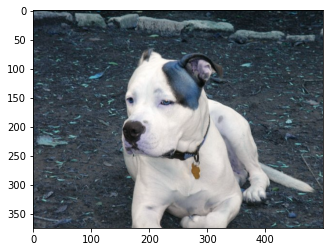

In [27]:
filename = X_train[97]
img = cv2.imread(DATASET_FOLDER+filename)
plt.imshow(img)

In [28]:
x0=d1.iloc[97,3]
y0=d1.iloc[97,4]
x1=d1.iloc[97,5]
y1=d1.iloc[97,6]
#original bounding box co-ordinate

In [29]:
x0,y0,x1,y1

(154, 66, 326, 253)

In [ ]:
### code to rescale the scaled bounding boxes
### we may not required here as already we have the original BB
# import cv2
# # Pick a random image to check how it looks
# filename = X_train[97]
# unscaled = cv2.imread(filename)
# region = y_train[97]
# image_height, image_width, _ = unscaled.shape
# x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
# y0 = int(region[1] * image_height / IMAGE_SIZE)

# x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
# y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

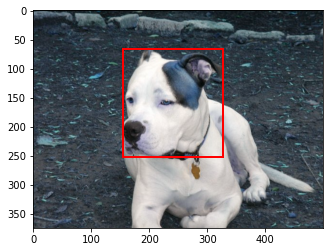

In [30]:
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, 
                         edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

# All the bounding boxes are framed for face region of dog or cat

##### Read all the images and resize it to 128x128
##### Pre-process it with respect to Mobilenet model

In [32]:
for i, f in enumerate(X_train):
  img = Image.open(DATASET_FOLDER+f) # Read image
  img = img.resize((128, 128)) # Resize image
  img = img.convert('RGB')

  X_train[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()

In [33]:
X_train[0].shape

(128, 128, 3)

In [34]:
X_train = np.array(X_train)

In [35]:
X_train.shape # 3006 images of each 128x128x3 size present in the train dataset

(3006, 128, 128, 3)

In [36]:
y_train.shape

(3006, 4)

In [37]:
#Perform the same things with validation data
d1=pd.read_csv(VALIDATION_CSV,header=None)
d1.head(2)

,0,1,2,3,4,5,6,7,8
0,C:/Users/Amit/Documents/Great Learning/M6 Adva...,500,333,1,34,257,303,abyssinian,0
1,C:/Users/Amit/Documents/Great Learning/M6 Adva...,500,333,88,94,207,195,abyssinian,0


In [38]:
X_val=[]
for i in range(len(d1)):
    X_val.append( "/" + 
                   d1[0][i].split('/')[-1])

In [39]:
yval=pd.DataFrame()
yval['x0']=d1[3]*128/d1[2]
yval['y0']=d1[4]*128/d1[1]
yval['x1']=(d1[5]-d1[3])*128/d1[2]
yval['y1']=(d1[6]-d1[4])*128/d1[1]

In [40]:
y_val=np.array(yval)

In [41]:
y_val

array([[ 0.38438438,  8.704     , 98.4024024 , 68.864     ],
       [33.82582583, 24.064     , 45.74174174, 25.856     ],
       [ 6.99678457, 10.        , 77.78778135, 62.        ],
       ...,
       [52.48      , 36.18133333, 28.928     , 45.056     ],
       [24.832     ,  6.03141361, 49.408     , 76.06282723],
       [11.776     , 19.21921922, 67.84      , 88.02402402]])

In [42]:
X_val[:5]

['/Abyssinian_118.jpg',
 '/Abyssinian_124.jpg',
 '/Abyssinian_131.jpg',
 '/Abyssinian_14.jpg',
 '/Abyssinian_15.jpg']

In [43]:
for i, f in enumerate(X_val):
  img = Image.open(DATASET_FOLDER+f) # Read image
  img = img.resize((128, 128)) # Resize image
  img = img.convert('RGB')

  X_val[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()

In [44]:
X_val = np.array(X_val)

In [45]:
X_val.shape # 680 images of each 128x128x3 size present in the validation dataset

(680, 128, 128, 3)

In [46]:
y_val.shape

(680, 4)

##### Define evaluation metric

Accuracy is not a good measure for object detection. The overlapping area between actual and predicted bounding boxes can be used as a measure to evaluate the quality of object detection/localization. Intersection over Union (IoU) can be used as a metric. 

In [48]:
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

In [49]:
def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], 
                                 Tout=tensorflow.float32)
    return iou

In [50]:
IMAGE_SIZE=128
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). 
#Higher width means more accurate but slower

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), 
                      include_top=False, alpha=ALPHA) 
    # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous ]
         #layer so that only 4 coords of BBox can be output
    den1 = model.layers[-1].output
    den2 = Conv2D(4, kernel_size=4, name="coords")(den1)
    # In the line above kernel size should be 3 for img size 96, 4 for 
    #img size 128, 5 for img size 160 etc.
    den3 = Reshape((4,))(den2) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=den3)

##### Initialize the model and print summary

In [51]:
model = create_model(False) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128    

##### Compile the model
- loss: "mean_squared_error"
- metrics: IoU
- optimizer: "adam"

In [52]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU,'accuracy']) # Regression loss is MSE

### Training the model

Fit the model to the dataset
- Use early stopping
- fit the model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [54]:
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, min_delta=0.01)

# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[callback])

Epoch 1/10
94/94 [==============================] - 13s 138ms/step - loss: 54.4138 - IoU: 0.7118 - accuracy: 0.8293 - val_loss: 87.3405 - val_IoU: 0.6578 - val_accuracy: 0.7882
Epoch 2/10
94/94 [==============================] - 12s 123ms/step - loss: 39.7118 - IoU: 0.7464 - accuracy: 0.8510 - val_loss: 87.2940 - val_IoU: 0.6552 - val_accuracy: 0.7897
Epoch 3/10
94/94 [==============================] - 12s 124ms/step - loss: 30.0793 - IoU: 0.7753 - accuracy: 0.8769 - val_loss: 86.1835 - val_IoU: 0.6598 - val_accuracy: 0.7926
Epoch 4/10
94/94 [==============================] - 11s 118ms/step - loss: 23.0480 - IoU: 0.8014 - accuracy: 0.8902 - val_loss: 89.2169 - val_IoU: 0.6593 - val_accuracy: 0.7706
Epoch 5/10
94/94 [==============================] - 11s 120ms/step - loss: 18.1849 - IoU: 0.8215 - accuracy: 0.9052 - val_loss: 88.1381 - val_IoU: 0.6614 - val_accuracy: 0.7794
Epoch 6/10
94/94 [==============================] - 12s 124ms/step - loss: 14.1611 - IoU: 0.8412 - accuracy: 0.9145

### Final loss and accuracy

In [55]:
model.evaluate(X_val, y_val)

22/22 [==============================] - 2s 93ms/step - loss: 92.4329 - IoU: 0.6532 - accuracy: 0.7632


[92.4328842163086, 0.6532318592071533, 0.7632352709770203]

### Test the model on an image from test data

In [58]:
# Pick a test image, run model, show image, and show predicted bounding box overlaid on the image
filename = '/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/Session 3/images/shiba_inu_163.jpg'

unscaled = cv2.imread(filename) # Original image for display

In [59]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (128, 128)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", image.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (128, 128, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)


In [60]:
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox
region

1/1 [==============================] - 1s 673ms/step


array([44.616528,  8.140614, 33.2994  , 43.276237], dtype=float32)

Fetching coordinates details

In [61]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

Now, let's plot the image and the bounding box on top of it

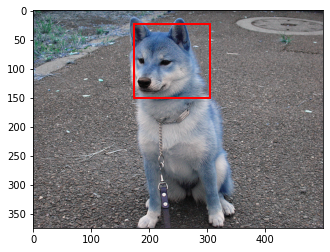

In [62]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [63]:
# Pick a test image, run model, show image, and show predicted bounding box overlaid on the image
filename = '/content/drive/MyDrive/GL/Fourth Sem/Advanced DL/Session 3/images/Abyssinian_14.jpg'

unscaled = cv2.imread(filename) # Original image for display

In [64]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

In [65]:
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox

1/1 [==============================] - 0s 31ms/step


Fetching coordinates details

In [66]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

Now, let's plot the image and the bounding box on top of it

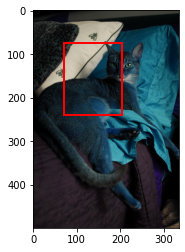

In [67]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()